# Problem4 The ferromagnetic Ising model

In this section we are interested in the phase ferromagnetic/paramagnetic phase trnasition in a graph. 

First we look at the MCMC algorithm to determine for several temperature the value of $\pi$. 

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random as rdm

In [4]:
#Degree Probability distribution
def degree(pi_p):
    if rdm.random() < (1-pi_p):
        return 1
    else:
        return 4

In [5]:
# excess degree dstribution
def q_d(pi_p):
    if rdm.random() < (1-pi_p)/(1+3*pi_p):
        return 0
    else:
        return 3

In [6]:
# definition of a function that will create the graph
def Graph(N_p,pi_p):
    c=False
    while c==False:
        K=[]
        for i in range(N_p):
            K.append(degree(pi_p)) #Creation of the list of all degrees
        if sum(K)%2 == 0:
            c=True
    Gr = nx.configuration_model(K)
    return Gr

In [7]:
# definition of the variation of energy when a spin a turned upside down
def DeltaE(v_p,S_p,G_p):
    return  2*S_p[v_p]*sum(S_p[i] for i in G_p[v_p])

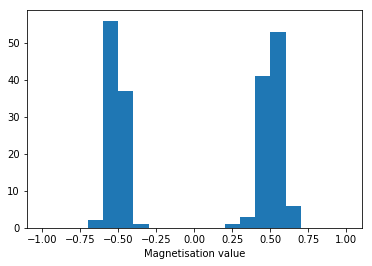

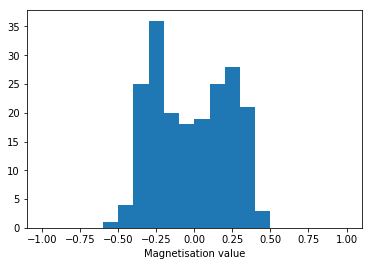

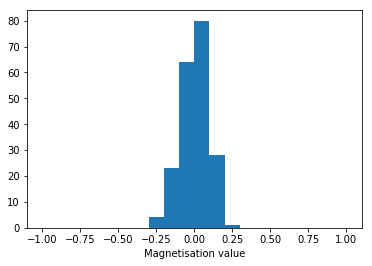

KeyboardInterrupt: 

In [30]:
N = 1000
pi = 1
G = Graph(N,pi)
S = [rdm.choice([1,-1]) for i in range(N)]
nstep = 1000000

for pi in [0.3,0.7]:
    for T in [1,1.5,2,2.5,3]:
        Magn = []
        for q in range(200):
            G = Graph(N,pi)
            S = [rdm.choice([1,-1]) for i in range(N)]
            for k in range(nstep):
                v = rdm.randint(0,N-1)# pick randomly a spin
                if DeltaE(v,S,G) > 0:
                    if rdm.uniform(0,1) < np.exp(-DeltaE(v,S,G)/T):
                        S[v] *= -1 # change the configuration 
                else:
                    S[v]*=-1
            Magn.append(sum(S)/N)
        plt.figure()
        plt.hist(Magn,bins=20,range=(-1,1))
        plt.xlabel('Magnetisation value')
        plt.show()
        title = 'pi_' + str(pi) + '_T_' + str(T) + '.png'
        plt.savefig(title)

The result are quit simple to analyse. We find for high temperature an histogram centered in zero with non zero standard deviation. Overall the histogram look like a gaussian. 
For increase temperature the "gaussian" separate symmetrically with the origin to lead two value of the magnitisation. This is coherent with our knowledge of the phase transition where +m and -m are equivalent. 
The temperature at which this is observe is the critical temperature and is around 2.9 for $\pi = 1$ and decrease down to 1.5 for $\pi \rightarrow 0$.

Let's look at the Belief propagation method : a fictional field $h_{ij}$ is considered as a message sending from spin i to spin j. And the magnetisation is then computed like h was a real field. 

In [141]:
Graf=Graph(750,1)
h = dict() # contains the messages
for i,j in Graf.edges():
    h[(j,i)] = rdm.random() # initialisation
    h[(i,j)] = rdm.random() # needed for equivalence (i,j) <=> (j,i) 
m=[]
Tt = np.linspace(0.7,3.5,20)
for T in Tt: 
    for n in range(1000):
        for i,j in Graf.edges():
            dh=0
            for k in Graf[j]:
                if k != i:
                    dh += T/2 * np.log( (np.cosh( (h[(j,k)] + 1)/T) ) / np.cosh( (h[(j,k)] - 1)/T ))
            h[(j,i)] = dh
            h[(i,j)] = dh
    H=[]
    for i,j in Graf.edges():
        H.append(h[(i,j)])
    m.append(np.tanh(np.mean(H)/T)) 
plt.plot(Tt,m,'.')
plt.ylabel('Magnetisation')
plt.xlabel('Temperature')
plt.savefig('PhaseDiag_Ising_BP.png')

The obtained phase diagram is here : ![phase_diag_BP](PhaseDiag_Ising_BP.png) 

One can see that the critical temperature $T_c$ is between 2.76 et 2.9 which correspond perfectly with what the MCMC simulation conclude for $\pi =1$. The advantage here is that we obtain the full phase diagram.

One would now change he value of $\pi$ and look at all the phase diagrams. 